In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PT2 + I

The transfer function of the process:

$$ P(s) = \frac{k}{1+2\xi T s + T^2 s^2}$$

and the conroller:

$$ C(s) = \frac{1}{T_I s} $$

The open loop transfer function $G_0(s)=C(s)P(s)$ :

$$ G_0(s) = \frac{k}{T_I s(1+2\xi T s + T^2 s^2)}$$

the closed loop transfer function for reference tracking is (homework to check):

$$ G(s) = \frac{1}{1+T_1 s + T_2^2 s^2 + T_3^3 s^3}$$

where

$$ T_1 = \frac{T_I}{k}$$

$$ T_2 = \sqrt{\frac{2\xi T_I T}{k}}$$

$$ T_3 = \sqrt[3]{\frac{T_I T^2}{k}} $$

**Q1.** Calculate the frequency response of the open loop and closed loop and plot them in Bode-plot! (Open loop given as example.)

In [2]:
# Defining Gjom for open loop
k = 5
T = 1/10
xi = 0.7
TI = 1

N = 1000
omega = np.logspace(0,2,N)
G0_jom = k/(TI*1j*omega*(1+ 2*xi*T*1j*omega - T**2 * omega**2))

# for Bode
K0om = np.abs(G0_jom)
K0om_dB = 20*np.log10(K0om)
phi0om = np.degrees(np.unwrap(np.angle(G0_jom))) # unwrapping phase for removing apparent discontinouity
# for Nyquist
reG0 = np.real(G0_jom)
imG0 = np.imag(G0_jom)

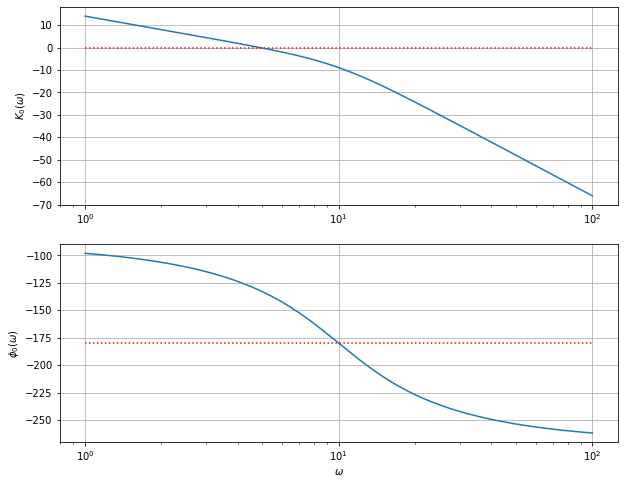

In [3]:
# Bode plot of open loop
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.semilogx(omega,K0om_dB), plt.grid(True), plt.ylabel('$K_0(\omega)$')
plt.semilogx(omega,0*K0om_dB,'r:')
plt.subplot(2,1,2)
plt.semilogx(omega,phi0om), plt.grid(True), plt.ylabel('$\phi_0(\omega)$'), plt.xlabel('$\omega$')
plt.semilogx(omega,0*phi0om - 180,'r:');

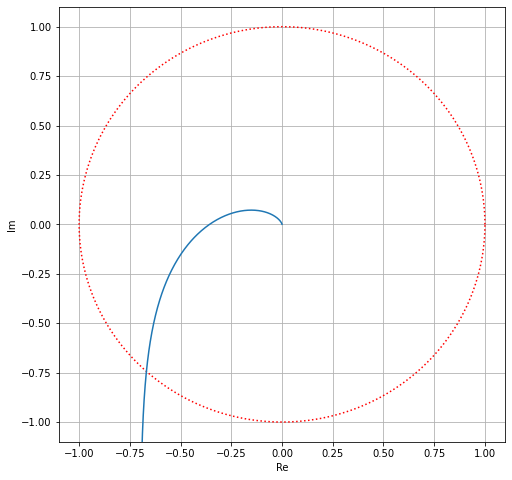

In [4]:
# Nyquist plot of open loop
plt.figure(figsize=(8,8))
# unit circle for stability check
theta = np.linspace(0,2*np.pi,1000)
plt.plot(np.cos(theta),np.sin(theta),'r:')
# Nyquist plot
plt.plot(reG0,imG0), plt.grid(True)
plt.ylim([-1.1,1.1]) # override autoscaled y axis to have a better looking plot
plt.xlabel('Re'), plt.ylabel('Im');

In [35]:
# Defining Gjom for closed loop
k = 5
T = 1/10
xi = 0.7
TI = 0.4

T1 = TI/k
T2 = np.sqrt((2*xi*TI*T)/k)
T3 = np.cbrt((TI*T**2)/k)


N = 1000
omega = np.logspace(0,2,N)
G0_jom = 1/(1+T1*1j*omega-T2**2*omega**2-pow(T3,3)*1j*omega)

# for Bode
K0om = np.abs(G0_jom)
K0om_dB = 20*np.log10(K0om)
phi0om = np.degrees(np.unwrap(np.angle(G0_jom))) # unwrapping phase for removing apparent discontinouity
# for Nyquist
reG0 = np.real(G0_jom)
imG0 = np.imag(G0_jom)

In [ ]:
# calculate the poles of the closed loop system, check for stability 
# ?

# Investigating the plots shows that the system is stable

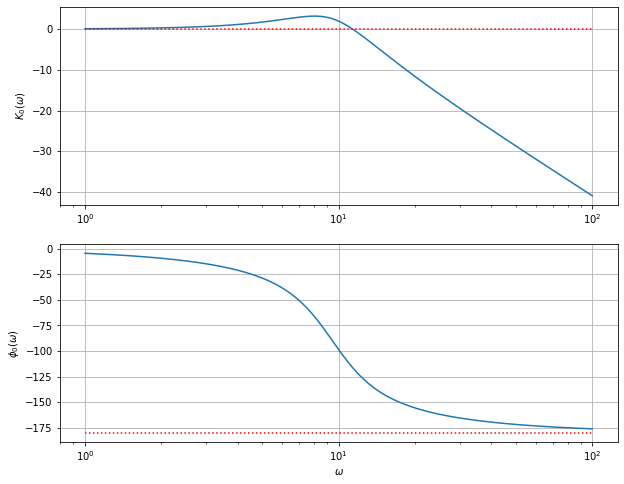

In [36]:
# Bode plot of closed loop
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.semilogx(omega,K0om_dB), plt.grid(True), plt.ylabel('$K_0(\omega)$')
plt.semilogx(omega,0*K0om_dB,'r:')
plt.subplot(2,1,2)
plt.semilogx(omega,phi0om), plt.grid(True), plt.ylabel('$\phi_0(\omega)$'), plt.xlabel('$\omega$')
plt.semilogx(omega,0*phi0om - 180,'r:');

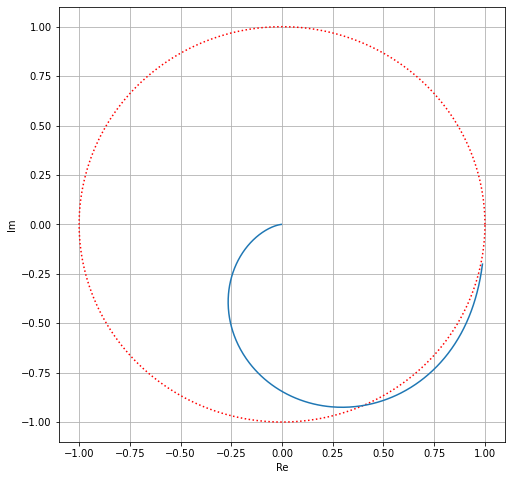

In [28]:
# Nyquist plot of closed loop
plt.figure(figsize=(8,8))
# unit circle for stability check
theta = np.linspace(0,2*np.pi,1000)
plt.plot(np.cos(theta),np.sin(theta),'r:')
# Nyquist plot
plt.plot(reG0,imG0), plt.grid(True)
plt.ylim([-1.1,1.1]) # override autoscaled y axis to have a better looking plot
plt.xlabel('Re'), plt.ylabel('Im');

**Q2.** Investigate the effect of parameter ($k, T, \xi, T_I$) changes.